<a href="https://colab.research.google.com/github/harishraj2108/prediction--project/blob/main/temperature_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('DailyDelhiClimateTest (2).csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


we check for the missing values in the data set

In [6]:
df.isnull().sum()


,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


it is evident that there is no missing value in the data set.The data set is clean

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [9]:
df['date'].unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
       '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
       '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
       '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
       '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
       '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
       '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
       '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
       '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
       '2017-02-26', '2017-02-27', '2017-02-28', '2017-03-01',
       '2017-03-02', '2017-03-03', '2017-03-04', '2017-

analysis of humidy over the period of time

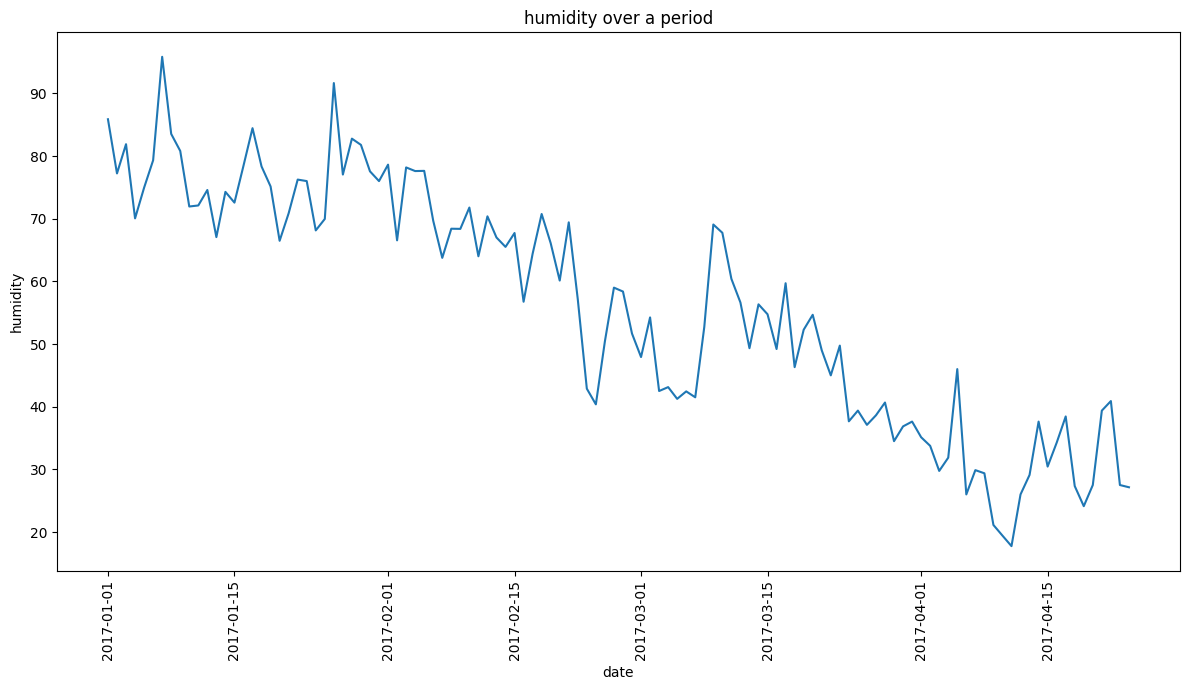

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
df['day_of_year'] = df['date'].dt.dayofyear
plt.plot(df['date'], df['humidity'])

plt.xlabel('date')
plt.ylabel('humidity')
plt.title('humidity over a period')


plt.xticks(rotation=90)


plt.tight_layout()


plt.show()

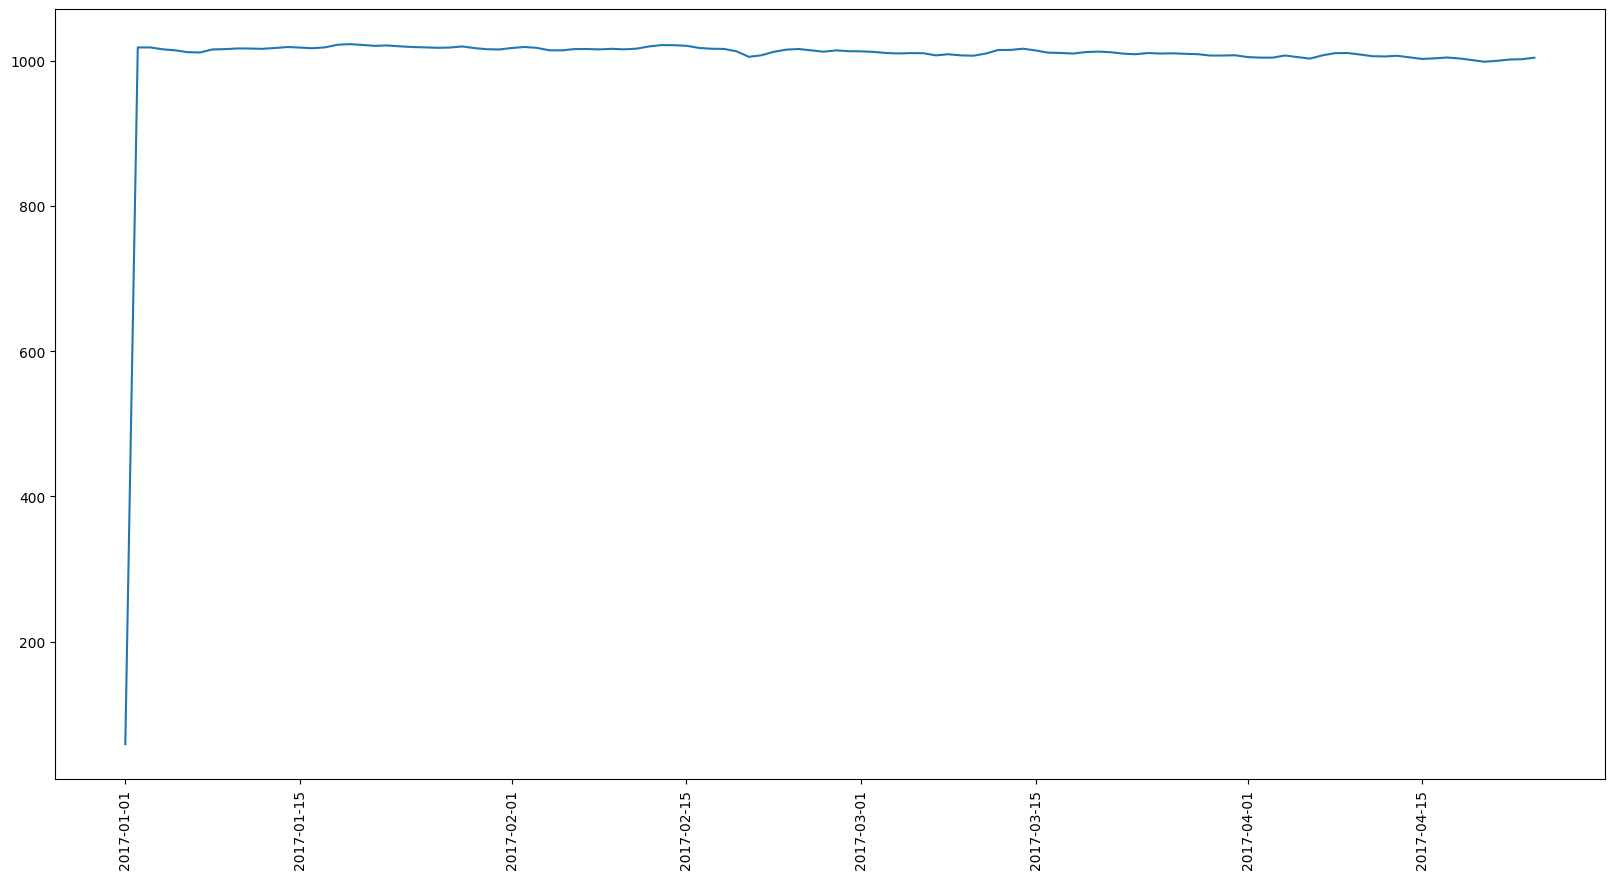

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df['day_of_year'] = df['date'].dt.dayofyear
plt.plot(df['date'], df['meanpressure'])
plt.xticks(rotation=90)

plt.show()

Data processing:
We must convert the date string column into a proper datetime object and extract meaningful numerical features from it (like the day of the year or month).

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('DailyDelhiClimateTest (2).csv')
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

df = df.drop('date', axis=1)


print("Features after processing:")
print(df.head())

Features after processing:
    meantemp   humidity  wind_speed  meanpressure  day_of_year  month  \
0  15.913043  85.869565    2.743478     59.000000            1      1   
1  18.500000  77.222222    2.894444   1018.277778            2      1   
2  17.111111  81.888889    4.016667   1018.333333            3      1   
3  18.700000  70.050000    4.545000   1015.700000            4      1   
4  18.388889  74.944444    3.300000   1014.333333            5      1   

   day_of_week  
0            6  
1            0  
2            1  
3            2  
4            3  


Define Features (X) and target(Y):
We will set meantemp as the variable we want to predict (y) and use all other columns as the predictive features (X).

In [35]:
y = df['meantemp']
X = df.drop('meantemp', axis=1)

Split the Data:
The data is split into a training set (80%) for the model to learn from and a testing set (20%) for performance evaluation

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Model Selection , Training, and Prediction:We instantiate the RandomForestRegressor and train it using the .fit() method on the training data

In [37]:

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Evaluating the Model:
Finally, we assess how well the model performed on the unseen test data using the Mean Absolute Error (MAE), which gives the average magnitude of error in temperature predictions.

In [40]:

mae = mean_absolute_error(y_test, y_pred)

print(f"\nModel Training Results: ")
print(f"Mean Absolute Error (MAE) on Test Set: {mae:.2f} degrees Celsius")


Model Training Results: 
Mean Absolute Error (MAE) on Test Set: 1.37 degrees Celsius


thus we implemented RandomForestRegressor for learning model.From the observation temperature varies by  +1.37 or -1.37 degree celcius.